# Probably Interesting Data
---
For this assignment, I am using dataset: auto-mpg from UCI-ML datasets on Kaggle.

In [1]:
%%time

# Import all modules necessary for this exercise
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from  datetime import datetime as dt

# Render out plots inline
%matplotlib inline

CPU times: user 1.01 s, sys: 279 ms, total: 1.29 s
Wall time: 1.77 s


In [2]:
data = pd.read_csv ('../data/auto-mpg.csv')
data.tail ()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


## Visualizing the Datasets
---

In [3]:
def scatter (params, y):
    fig = plt.figure (figsize = (20, 10))
    num = 1
    for x in params:
        plt.subplot (3, 3, num)
        plt.scatter (data [x], data [y])
        plt.grid (True)
        plt.xlabel (x.capitalize (), fontweight = 'bold')
        plt.ylabel (y.capitalize (), fontweight = 'bold')
        plt.xticks ([], [])
        plt.yticks ([], [])
        num += 1
    plt.show ()

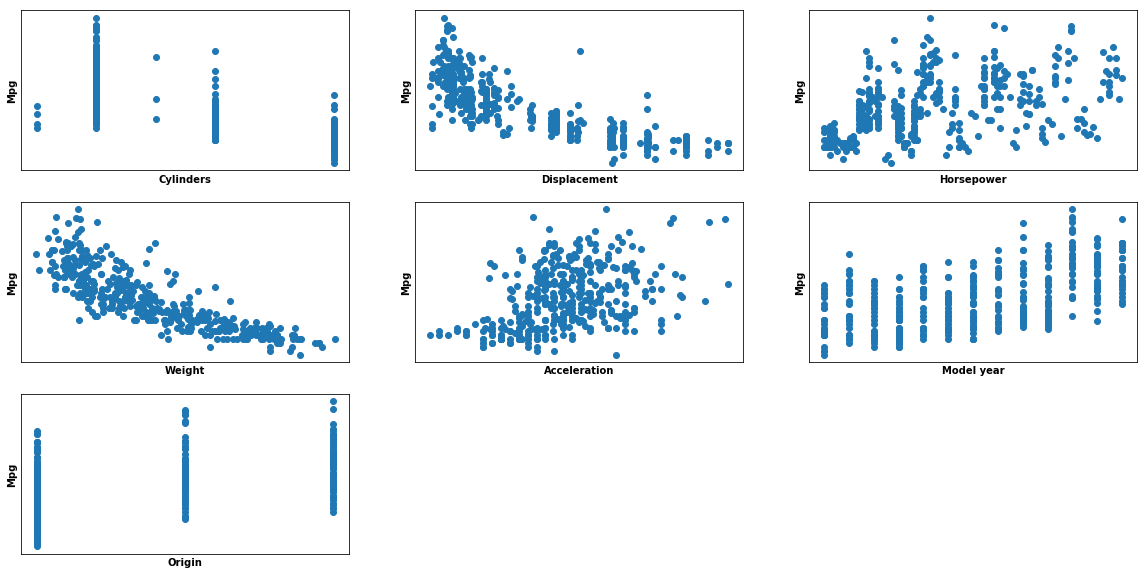

In [4]:
params = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
scatter (params, 'mpg')

## Further Analysis
---
In this dataset, there seems to be a *relatively* nice distribution between 'mpg' and 'weight'. For the sake of writing / analyzing my algorithm, I am using this distribution for further analysis.

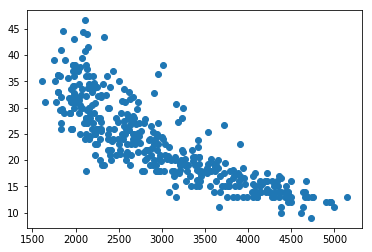

In [5]:
# MPG and Weight seem to form a legible distribution. Lets concentrate on it for K-means
mpg = data ['mpg'].values
weight = data ['weight'].values
acceleration = data ['acceleration'].values
plt.scatter (weight, mpg)
plt.show ()

In [6]:
# This routine transforms a dictionary of series into a dictionary of points; for use in K-means algorithm
def pointify (datasets):
    points = {}
    for pointNumber in xrange (len (datasets ['0'])):
        point = []
        for series in datasets.keys ():
            point.append (datasets [series][pointNumber])
        points [pointNumber] = point
    return points

points = pointify ({'0': weight, '1': mpg}) #, '2': acceleration})

# K-Means Clustering
---
We discussed K-means clustering in class and that seemed relatively easy for me to understand. So I am writing it in python for clustering my chosen dataset.

[ITER:   1] Centers  :  {0: [18.975, 3540.125], 1: [14.876, 4171.109], 2: [26.659, 2535.038]}
[LENGTHS  ] Clusters :  [8, 101, 289]
[UPDATE   ] Change   :  1415.251


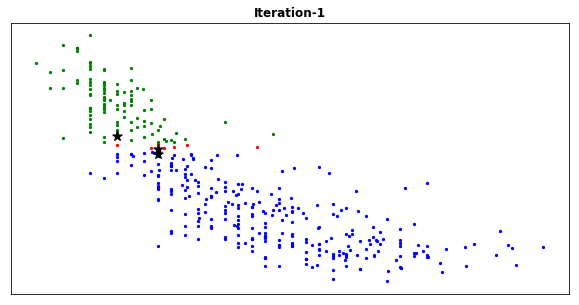

[ITER:   2] Centers  :  {0: [18.595, 3433.284], 1: [14.225, 4328.547], 2: [28.321, 2363.655]}
[LENGTHS  ] Clusters :  [88, 75, 235]
[UPDATE   ] Change   :  435.672


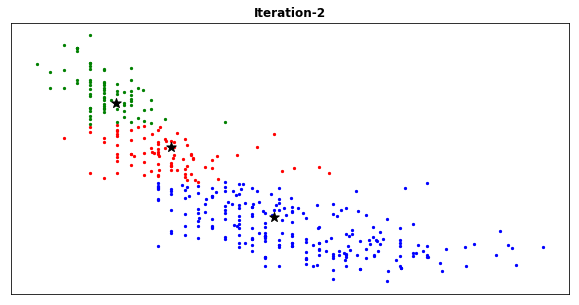

[ITER:   3] Centers  :  {0: [19.543, 3337.078], 1: [14.197, 4340.973], 2: [28.928, 2293.21]}
[LENGTHS  ] Clusters :  [115, 73, 210]
[UPDATE   ] Change   :  179.085


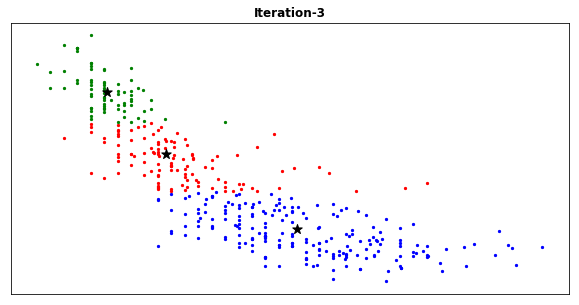

[ITER:   4] Centers  :  {0: [19.882, 3283.708], 1: [14.271, 4315.987], 2: [29.224, 2267.925]}
[LENGTHS  ] Clusters :  [120, 77, 201]
[UPDATE   ] Change   :  103.644


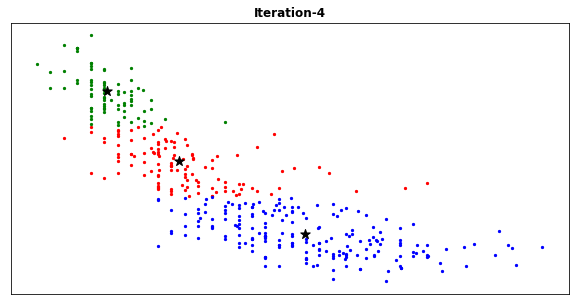

[ITER:   5] Centers  :  {0: [20.119, 3246.911], 1: [14.332, 4297.525], 2: [29.424, 2251.574]}
[LENGTHS  ] Clusters :  [123, 80, 195]
[UPDATE   ] Change   :  71.612


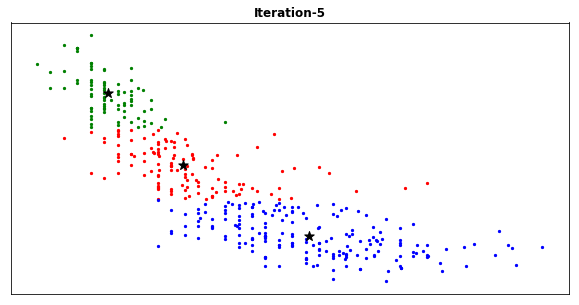

[ITER:   6] Centers  :  {0: [20.239, 3225.869], 1: [14.405, 4278.855], 2: [29.503, 2246.259]}
[LENGTHS  ] Clusters :  [122, 83, 193]
[UPDATE   ] Change   :  45.028


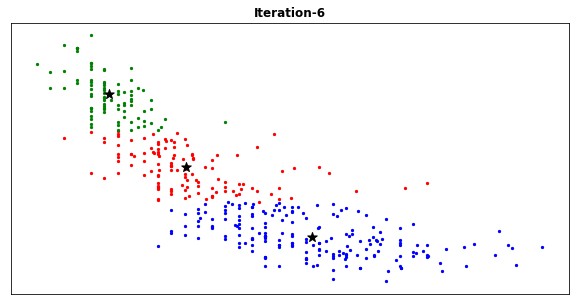

[ITER:   7] Centers  :  {0: [20.4, 3209.221], 1: [14.395, 4266.6], 2: [29.562, 2241.063]}
[LENGTHS  ] Clusters :  [122, 85, 191]
[UPDATE   ] Change   :  34.1


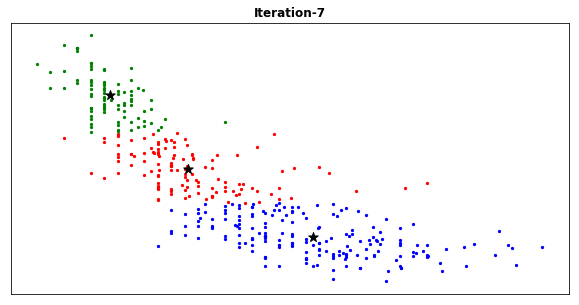

[ITER:   8] Centers  :  {0: [20.454, 3205.366], 1: [14.395, 4266.6], 2: [29.576, 2238.463]}
[LENGTHS  ] Clusters :  [123, 85, 190]
[UPDATE   ] Change   :  6.455


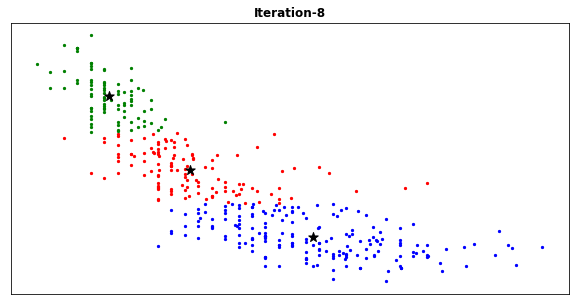

[ITER:   9] Centers  :  {0: [20.478, 3201.492], 1: [14.395, 4266.6], 2: [29.608, 2235.889]}
[LENGTHS  ] Clusters :  [124, 85, 189]
[UPDATE   ] Change   :  6.448


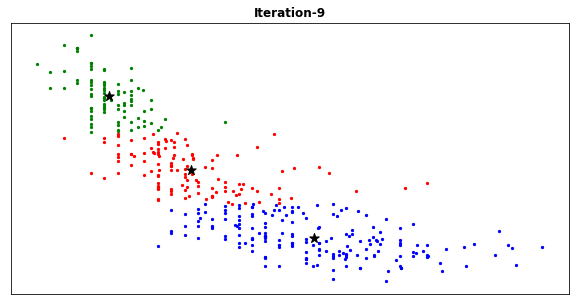

[ITER:  10] Centers  :  {0: [20.615, 3185.794], 1: [14.453, 4260.419], 2: [29.668, 2228.081]}
[LENGTHS  ] Clusters :  [126, 86, 186]
[UPDATE   ] Change   :  29.688


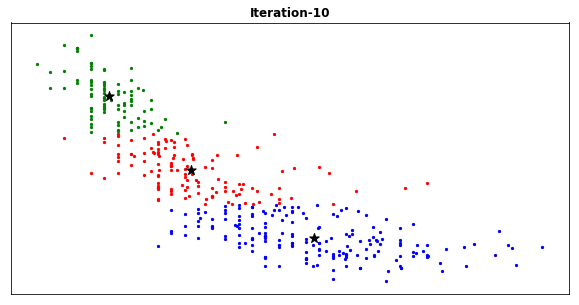

[ITER:  11] Centers  :  {0: [20.71, 3168.879], 1: [14.631, 4242.427], 2: [29.668, 2225.47]}
[LENGTHS  ] Clusters :  [124, 89, 185]
[UPDATE   ] Change   :  37.519


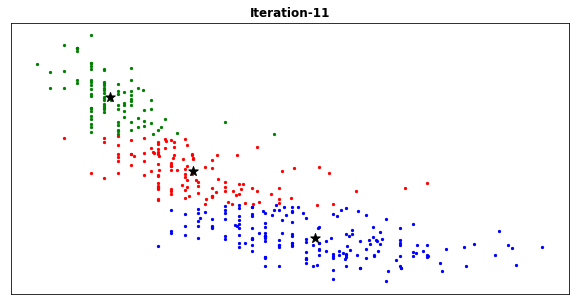

[ITER:  12] Centers  :  {0: [20.785, 3161.452], 1: [14.631, 4242.427], 2: [29.714, 2220.273]}
[LENGTHS  ] Clusters :  [126, 89, 183]
[UPDATE   ] Change   :  12.624


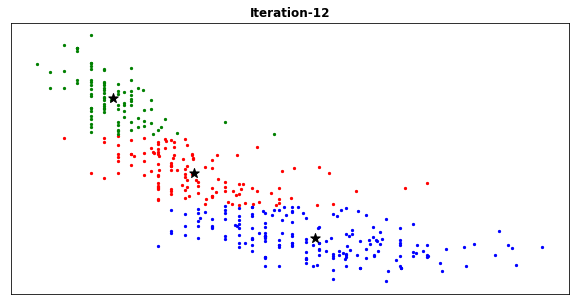

[ITER:  13] Centers  :  {0: [20.802, 3157.772], 1: [14.631, 4242.427], 2: [29.751, 2217.67]}
[LENGTHS  ] Clusters :  [127, 89, 182]
[UPDATE   ] Change   :  6.283


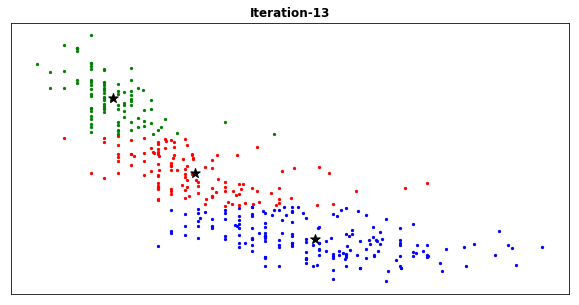

[ITER:  14] Centers  :  {0: [20.802, 3157.772], 1: [14.631, 4242.427], 2: [29.751, 2217.67]}
[LENGTHS  ] Clusters :  [127, 89, 182]
[UPDATE   ] Change   :  0.0


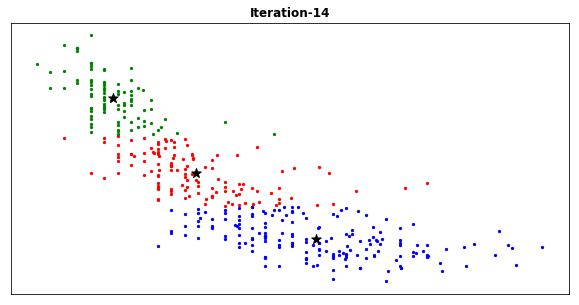

In [7]:
#################################################################################
# Steps of K-means
# 1. Select the number of clusters (i.e., centroids)
# 2. Pick (randomly) the centers of the clusters
# Repeat until convergence:
#     a. Classify points based on their distance from the centers
#     b. Recalculate the centers of the (new) clusters
#
# Input:  Collection of points. Eeach point must be a vector of numerical values
#         Number of clusters
# Output: Centers of clusters
#################################################################################

# Hard limit to stop clustering once the limit stated below is reached
BREAK_LIMIT = 20

colors = ['r', 'g', 'b', 'y', 'c', 'm']

def calcDistance (point1, point2):
    dist = 0
    for key in xrange (len (point1)):
        v1 = point1 [key]
        v2 = point2 [key]
        dist += (v2 - v1)**2
        
    return round (math.sqrt (dist), 3)

def stratify (cluster):
    x = []
    y = []
    for pointNum in cluster.keys ():
        point = cluster [pointNum]
        x.append (point [0])
        y.append (point [1])
        
    return x, y

def visualize (clusters, centers, title):
    fig, ax = plt.subplots (figsize = (10, 5))
    for clusterNum in clusters.keys ():
        cluster = clusters [clusterNum]
        x, y = stratify (cluster)
        ax.scatter (x, y, s = 5, c = colors [clusterNum])
    x, y = stratify (centers)
    ax.scatter (x, y, s = 100, marker = '*', c = 'k')
    plt.title (title, fontweight = 'bold')
    plt.xticks ([], [])
    plt.yticks ([], [])
    plt.show ()
    
    return
        
def kmeans (points, numOfClusters, DEBUG):
    # Randomly pick cluster centers
    centers = {}
    iteration = 1
    for n in xrange (numOfClusters):
        item = 1 #(len (points.keys ()) / numOfClusters)
        centers [n] = points [n * item]
    
    while (1):
        # Initialize clusters
        clusters = {}
        oldCenters = {}
        
        for n in xrange (numOfClusters):
            clusters [n] = {}
            oldCenters [n] = centers [n]
        
        # Classify point into clusters
        for pointNum in points.keys ():
            point = points [pointNum]
            minDistance = 10**10
            for centerNum in centers.keys ():
                center = centers [centerNum]
                distance = calcDistance (center, point)
                if distance < minDistance:
                    minDistance = distance
                    selCenter = centerNum
            clusters [selCenter][pointNum] = point
        
        # Recalculate cluster centers
        for clusterNum in clusters.keys ():
            cluster = clusters [clusterNum]
            try:
                center = np.zeros (len (cluster [cluster.keys ()[0]]))
            except:
                # A cluster has been eliminated
                continue
            numOfPoints = len (cluster.keys ())
            for pointNum in cluster.keys ():
                cNum = 0
                point = cluster [pointNum]
                for coordinate in point:
                    center [cNum] += coordinate
                    cNum += 1
            centers [clusterNum] = [round (x / numOfPoints, 3) for x in center]
        
        clusterLengths = [len (clusters [x]) for x in clusters.keys ()]
        
        # Stop clustering if the centers do not change
        improvement = 0
        for centerNum in centers.keys ():
            center = centers [centerNum]
            oldCenter = oldCenters [centerNum]
            improvement += calcDistance (center, oldCenter)
        
        if DEBUG:
            print '[ITER: %3d] Centers  : ' % (iteration), centers
            print '[LENGTHS  ] Clusters : ', clusterLengths
            print '[UPDATE   ] Change   : ', improvement
            visualize (clusters, oldCenters, 'Iteration-%d' % iteration)
        
        iteration += 1
        if ((not (improvement)) or (iteration > BREAK_LIMIT)):
            break
            
    return clusters, centers

clusters, centers = kmeans (points, 3, True)

K-means seems to be doing its job as expected.